<a href="https://colab.research.google.com/github/peiyulan/Embeddedsystem/blob/master/Solutions/2_WorkingWithTextInNLTK_sol_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLTK with Sentiment Analysis

**Date:** Feb 23, 2026

**Course:** Text Analysis with NLTK (Week 2); Centre for Data, Culture & Society

## Table of Contents

I. [Loading Data](#Loading_Data)

II. [Pre-processing](#pre-processing)

III. [Data Cleaning](#data_cleaning)

IV. [Analysis](#analysis)


<a id="Loading_Data"></a>
## I. Loading Data

In [42]:
# To load a CSV file with an inventory of the documents in the corpus
import pandas as pd
import numpy as np

# To create data visualizations
import altair as alt
import matplotlib.pyplot as plt

# To perform text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import twitter_samples, stopwords
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.draw.dispersion import dispersion_plot as displt
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('twitter_samples')
nltk.download('vader_lexicon')

import re # Regular Expressions (RegEx)
import string
import random
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


To get a sense of the data we're working with, let's create have a look at the documentation of nltk twitter sample corpus:

https://www.nltk.org/howto/corpus.html

Now we can follow the instruction of the documentation:

In [18]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

It shows that the corpus has been divided into three parts: negative, positive, and a combination of them.

As we want to do sentiment analysis, let's store the data into
`positive_twts` and `negative_twts`.

We can then a look at the size of the dataset.

In [19]:
positive_twts = twitter_samples.strings('positive_tweets.json')
negative_twts = twitter_samples.strings('negative_tweets.json')

In [20]:
print('Positive Tweets: ' + str(len(positive_twts)))
print('Negative Tweets: ' + str(len(negative_twts)))

Positive Tweets: 5000
Negative Tweets: 5000


It is a quite balanced dataset as each category has 5000 data point.

Now let's take a look at the actual tweets in the corpus.

In [21]:
print("positive:", positive_twts[5])
print("negative:",negative_twts[5])

positive: @BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM
negative: oh god, my babies' faces :( https://t.co/9fcwGvaki0


---

<a id="pre-processing"></a>
## II. Pre-processing

As we discussed last week, it’s important to clean up the text before starting your analysis. This helps remove unwanted noise and errors, generating to more reliable results.

In general, pre-processing includes the following steps:

1. Use regular expressions (regex) to remove punctuation and unwanted characters.
2. Normalise the text by converting it to lowercase.
3. Perform tokenisation.
4. Remove stopwords.
5. Apply stemming or lemmatisation.

### Regular Expresssions (RegEx)

* **WHAT? Pattern matching strings in Python**
* **WHY? To find specific words or phrases, or variations of a particular word or phrase**
    * Once found, they can be replaced, so this is useful for cleaning text with digitization errors.  Optical Character Recognition (OCR) and Handwriting Recognition (HWT or HRT) technologies are imperfect, so you will find errors in digitized text corpora (unless of course they've been manually reviewed and corrected).
* **HOW? Combinations of special characters with a RegEx compiler**
    * In programming, a *compiler* translates code from one programming language to another.  In a sense, RegEx is a language that can sit on top of Python.  RegEx works with Python data types and syntax but it also has its own special characters and methods that plain Python doesn't use.
    
Resource for practice with and testing Regular Expressions: [Regex101.com](https://regex101.com): also check out [W3Schools](https://www.w3schools.com/python/python_regex.asp) for the cheat sheet it provides!

In [22]:
# # To use Regular Expressions (RegEx)
# import re

To remove a substring (a selection of characters in a string), we can use an empty string (either `""` or `''`) as the second input for the `replace()` method.

In [23]:
txt = "Jenny and Josh are having lunch."
new_txt = re.sub(r'Jenny', 'Peter', txt)
print(txt)
print(new_txt)

Jenny and Josh are having lunch.
Peter and Josh are having lunch.


1. `[]` A set of characters. ex: "`[a-m]`"mean a to m
2. `\w`	Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
3. `+`	One or more occurrences

In [24]:
txt = "@BhaktisBanter @PallaviRuhail This one is irresistible :)"
new_txt = re.sub(r'@[\w]+', '', txt)
print(txt)
print(new_txt)

@BhaktisBanter @PallaviRuhail This one is irresistible :)
  This one is irresistible :)


Now let's try to remove links in the following text:

In [25]:
txt = "#FlipkartFashionFriday http://t.co/EbZ0L2VENM"

new_txt = re.sub(r'https?:\/\/.*[\r\n]*', '', txt)
print(txt)
print(new_txt)

#FlipkartFashionFriday http://t.co/EbZ0L2VENM
#FlipkartFashionFriday 


In [26]:
def cleaning(tweet):
    """
    Preproceeses a Tweet by removing hashes, RTs, @mentions,
    links, stopwords and punctuation, tokenizing and stemming
    the words.

    Accepts:
        tweet {str} -- tweet string

    Returns:
        {str}
    """
    clean_twt = re.sub(r'^RT[\s]+', '', tweet)
    clean_twt = re.sub(r'@[\w_-]+', '', clean_twt)
    clean_twt = re.sub(r'#', '', clean_twt)
    clean_twt = re.sub(r'https?:\/\/.*[\r\n]*', '', clean_twt)

    return clean_twt

In [27]:
clean_positive_twts = [cleaning(tweet) for tweet in positive_twts]
clean_negative_twts = [cleaning(tweet) for tweet in negative_twts]
print(clean_positive_twts[5])

  This one is irresistible :)
FlipkartFashionFriday 


### Tokenization

In [28]:
tokenizer = TweetTokenizer()
twt_tokens = tokenizer.tokenize(clean_positive_twts[5])
print(twt_tokens)

['This', 'one', 'is', 'irresistible', ':)', 'FlipkartFashionFriday']


In [29]:
pos_tokens = [tokenizer.tokenize(tweet) for tweet in clean_positive_twts]
print(pos_tokens[5])

['This', 'one', 'is', 'irresistible', ':)', 'FlipkartFashionFriday']


### Lowercasing

Let's casefold to normalize so capitalized and lowercased versions of words are considered the same word:

In [30]:
def lowercase_all(words):
    return [word.lower() for word in words]


txt = ["SAMPLE", "Text"]
new_text = lowercase_all(txt)
print(new_text)

['sample', 'text']


In [31]:
pos_tokens = [lowercase_all(token) for token in pos_tokens]

### Remove Stopwords

...and exclude stopwords using `stopwords.words(language)`:

In [32]:
pos_tokens_nosd = []
stopwords_en = stopwords.words('english')
for word in pos_tokens[5]:
    if word not in stopwords_en and word not in string.punctuation:
        pos_tokens_nosd.append(word)


In [33]:
print(stopwords_en)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [34]:
print(pos_tokens[5])
print(pos_tokens_nosd)

['this', 'one', 'is', 'irresistible', ':)', 'flipkartfashionfriday']
['one', 'irresistible', ':)', 'flipkartfashionfriday']


In [35]:
def tokenise_tweet(tweets):
    clean_tokens = []
    twt_tokens = tokenizer.tokenize(tweets)

    # lowercasing
    lower_tokesns = lowercase_all(twt_tokens)

    # is alphabetical
    alph_tokens = [token for token in lower_tokesns if token.isalpha()]


    # remove stopword
    stopwords_en = stopwords.words('english')
    for word in alph_tokens:
        if word not in stopwords_en and word not in string.punctuation:
            clean_tokens.append(word)

    # stemming
    #twt_stems = []
    #stemmer = PorterStemmer()
    #for word in clean_tokens:
    #    twt_stems.append(stemmer.stem(word))

    return clean_tokens

In [36]:
pos_twt_token = [tokenise_tweet(tweet) for tweet in clean_positive_twts]
neg_twt_token = [tokenise_tweet(tweet) for tweet in clean_negative_twts]

In [37]:
print("original:\n", positive_twts[5])
print("\nafter regex:\n", clean_positive_twts[5])
print("\nnormalised, stemmed, stopwords removed:\n",pos_twt_token[5])

original:
 @BhaktisBanter @PallaviRuhail This one is irresistible :)
#FlipkartFashionFriday http://t.co/EbZ0L2VENM

after regex:
   This one is irresistible :)
FlipkartFashionFriday 

normalised, stemmed, stopwords removed:
 ['one', 'irresistible', 'flipkartfashionfriday']


<a id="analysis"></a>
## IV. Analysis

In [38]:
import itertools

def freq_plot(corpus, n):
    word = list(itertools.chain.from_iterable(corpus))
    fdist = FreqDist(word)
    plt.figure(figsize = (20, 8))
    plt.rc('font', size=12)
    fdist.plot(n, title=f'Frequency Distribution for {n} Most Common Tokens in the Dataset (excluding stop words)')
    plt.show()

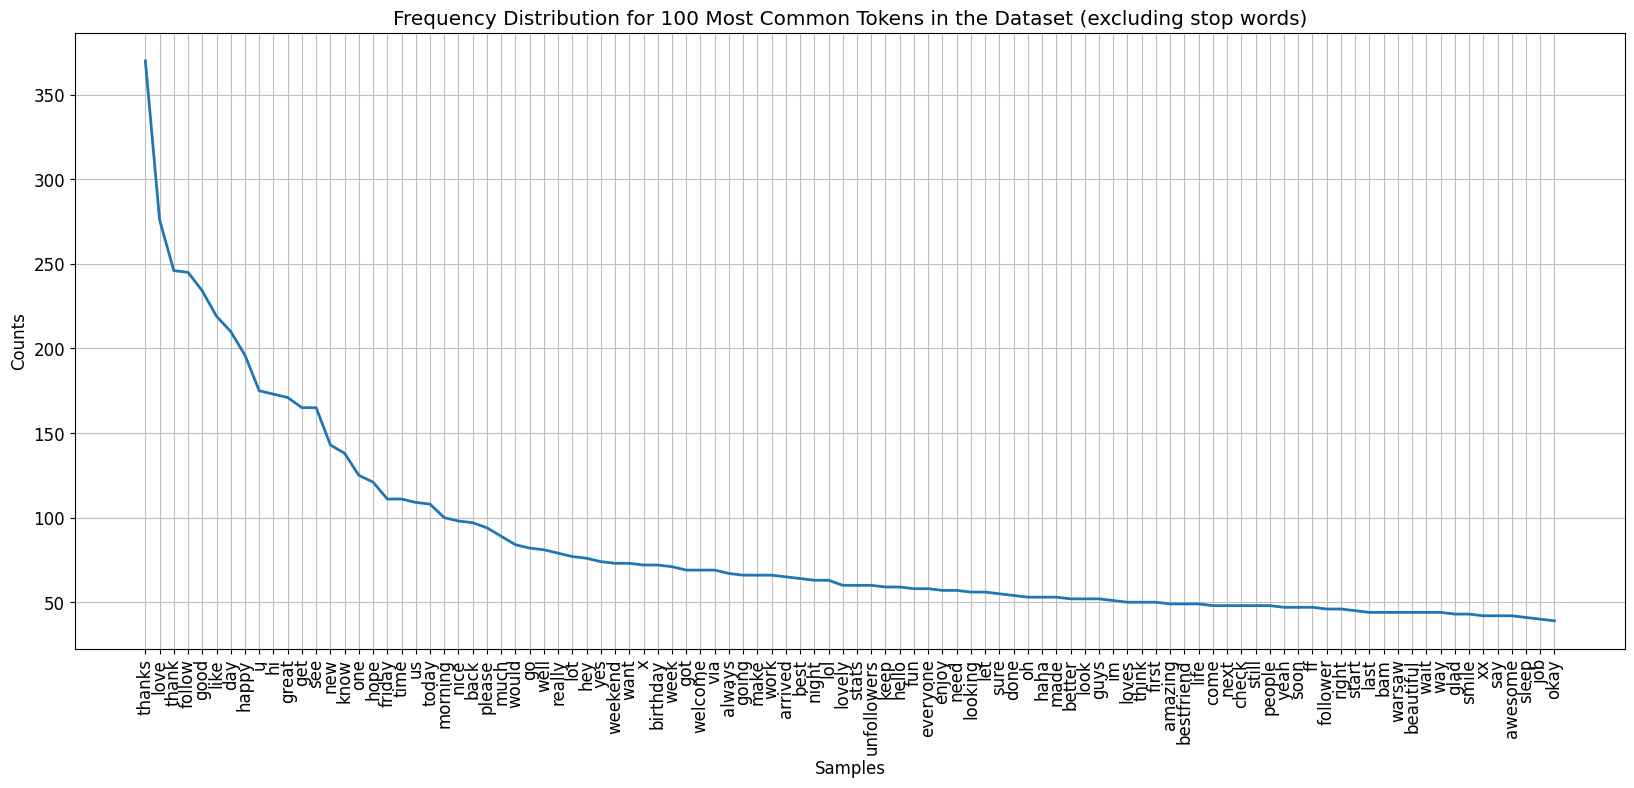

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65363 (\N{FULLWIDTH LATIN SMALL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65349 (\N{FULLWIDTH LATIN SMALL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65357 (\N{FULLWIDTH LATIN SMALL LETTER M}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


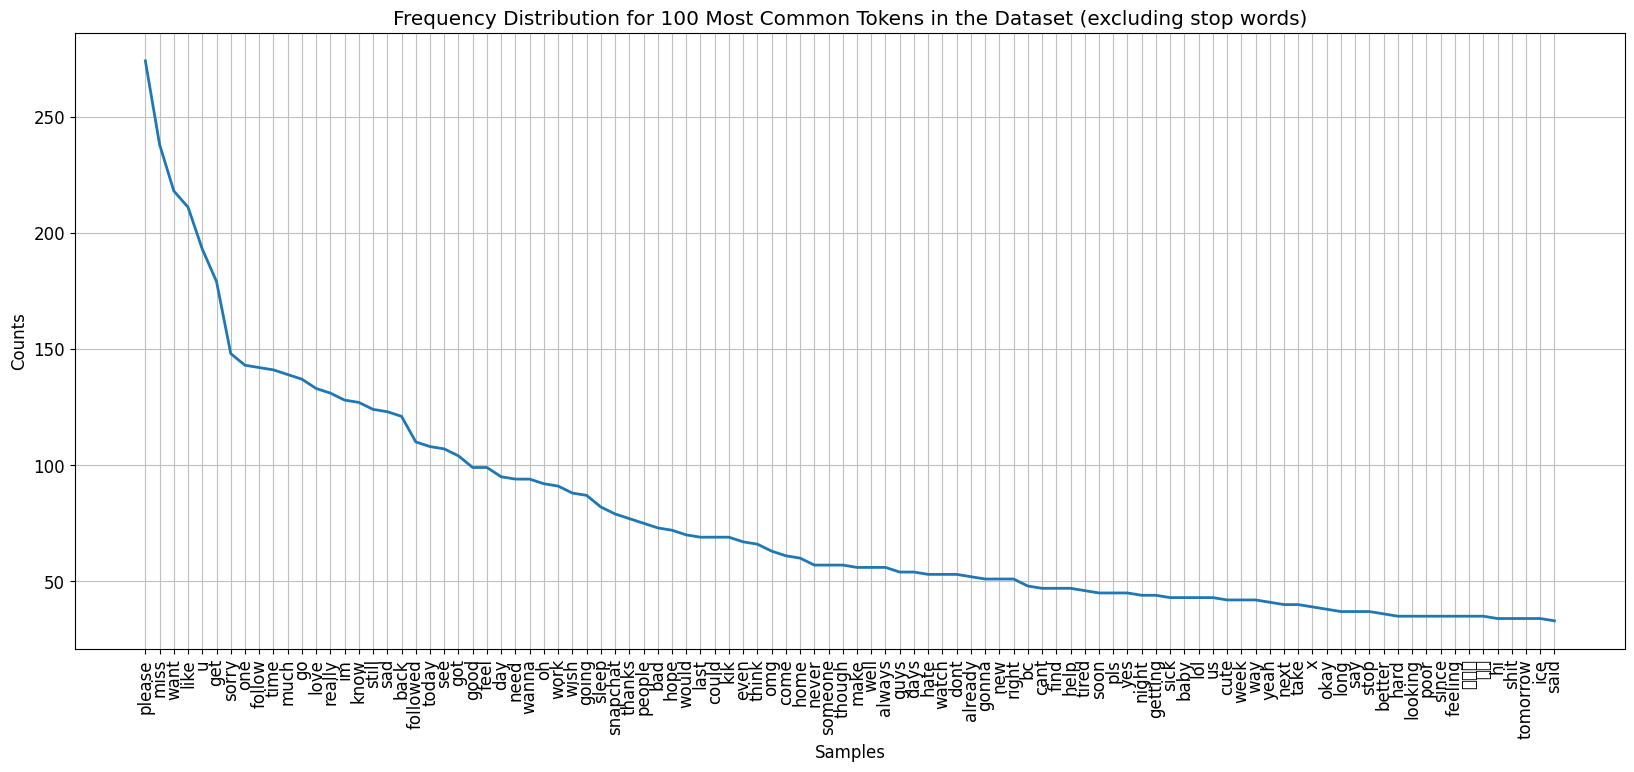

In [39]:
freq_plot(pos_twt_token, 100) ## Try increasing or decreasing this number to view more or fewer tokens in the visualization
freq_plot(neg_twt_token, 100)

Using NLTK’s VADER Sentiment Analyzer (Lexicon-based) as an example perform sentimet analysis.

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a sentiment analysis tool designed to capture sentiments expressed in **social media**, which makes it particularly effective in analysing tweets.

One advantage of VADER is that it does not classify text as positive or negative; it also indicates the intensity of the sentiment. In the output, it provides separate scores for positive, negative, and neutral components.

In addition, VADER returns a fourth value, the compound score. This is a normalised metric that aggregates the overall sentiment and ranges from –1 to 1. Based on this score, we determine whether the overall sentiment is positive, negative, or neutral.

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer

def get_vader_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return ['positive, socre:',compound]
    elif compound <= -0.05:
        return ['negative, socre:',compound]
    else:
        return ['neutral, socre:',compound]

In [43]:
sample_text = "thank you!"
print(get_vader_sentiment(sample_text))

['positive, socre:', 0.4199]


In [44]:
print(get_vader_sentiment("thank"))
print(get_vader_sentiment("you!"))

['positive, socre:', 0.3612]
['neutral, socre:', 0.0]
